In [1]:
import bittensor
import torch
import time
from multiprocessing import Pool


wallet =  bittensor.wallet (
    path = '/tmp/pytest',
    name = 'pytest',
    hotkey = 'pytest',
) 

wallet.create_new_coldkey( use_password=False, overwrite = True)
wallet.create_new_hotkey( use_password=False, overwrite = True)
logging =bittensor.logging(debug=True)


IMPORTANT: Store this mnemonic in a secure (preferable offline place), as anyone who has possesion of this mnemonic can use it to regenerate the key and access your tokens. 

The mnemonic to the new coldkey is:

stay hedgehog clump surface muscle exhaust marriage burger anchor keep economy obtain

You can use the mnemonic to recreate the key in case it gets lost. The command to use to regenerate the key using this mnemonic is:
btcli regen_coldkey --mnemonic stay hedgehog clump surface muscle exhaust marriage burger anchor keep economy obtain


IMPORTANT: Store this mnemonic in a secure (preferable offline place), as anyone who has possesion of this mnemonic can use it to regenerate the key and access your tokens. 

The mnemonic to the new hotkey is:

kind swear venture peace snow attitude section movie jump horn child insect

You can use the mnemonic to recreate the key in case it gets lost. The command to use to regenerate the key using this mnemonic is:
btcli regen_hotkey --mnemonic

In [2]:
dataset =bittensor.dataset(batch_size=1,dataset_name=['Books3'],max_corpus_size=1,block_size=2048)


datasize: 2048
2022-01-12 13:28:50.136 |     SUCCESS      | Set debug:          ON
2022-01-12 13:28:50.136 |     SUCCESS      | Set trace:          OFF
2022-01-12 13:28:50.136 |     SUCCESS      | Set record log:     OFF
2022-01-12 13:28:58.968 |     SUCCESS      | Loaded dataset:     Books3
2022-01-12 13:28:59.343 |     WARNING      | Failed to retrieve directory, ignoring directory:{'Name': '17-Books3-4654.txt', 'Hash': 'QmSYVqSkvPnSvHNZwG8kNmYvpiFmXfgeeVqgECjDQLMzop', 'Size': 498906}
2022-01-12 13:29:00.079 |     SUCCESS      | Downloaded:         01-Books3-13712.txt
datasize: 2048


In [2]:
def forward( inputs_x):
    return torch.zeros([1, 42, bittensor.__network_dim__])
axon = bittensor.axon (
    port = 8080,
    ip = '0.0.0.0',
    wallet = wallet,
)
axon.attach_forward_callback( forward,  modality = bittensor.proto.Modality.TEXT )
axon.start()
endpoints = []
endpoint = bittensor.endpoint(
    version = bittensor.__version_as_int__,
    uid = 1,
    hotkey = 'abc',
    ip = '0.0.0.0', 
    ip_type = 4, 
    port = 8080, 
    modality = 0, 
    coldkey = ''
)
endpoints += [endpoint]
collection = 0 

inputs="""in my palm is a clear stone , and inside it is a
    small ivory statuette . a guardian angel .
    figured if you 're going to be out at night"""



2022-01-14 10:08:27.839 |     WARNING      | No modality detected. Defaulting to the text modality
2022-01-14 10:08:27.858 |     SUCCESS      | Axon Stopped:       0.0.0.0:8080
2022-01-14 10:08:27.862 |     SUCCESS      | Axon Started:       0.0.0.0:8080


In [3]:
axon.forward_callback

[<function __main__.forward(inputs_x)>, None, None]

In [4]:
def f(i):
    dend = bittensor.dendrite(wallet=wallet)
    for idx in range(1000):
        rep = dend.forward_text( endpoints=endpoints,inputs = inputs)
    return


In [5]:
dend = bittensor.dendrite(wallet=wallet)
rep = dend.forward_text( endpoints=endpoints,inputs = inputs)
print(rep)

2022-01-14 10:08:34.277 |     SUCCESS      | Receptor Pool Server Started
2022-01-14 10:08:34.282 |     SUCCESS      | Manager Server: Added 1 connection, total connections: 1
2022-01-14 10:08:34.286 |     SUCCESS      | Receptor Pool Server Connected
2022-01-14 10:08:37.220 |     Connect      | uid: 1   |      /ipv4/0.0.0.0:8080     | hotkey:abc | coldkey: 
2022-01-14 10:08:37.238 |     Success      | Dendrite | Forward  | ---> |   1   |     [1, 42]     | 0.01s  | abc | None 
2022-01-14 10:08:37.245 |     Success      |   Axon   | Forward  | ---> |   -   |     [1, 42]     | 0.00s  | 5FLf1wL8hsjRqMxN455va6K3rKaoUVGASk9tG3Z3XCRz4UDm | None 
2022-01-14 10:08:37.254 |     Success      |   Axon   | Forward  | <--- |   -   |  [1, 42, 1024]  | 0.01s  | 5FLf1wL8hsjRqMxN455va6K3rKaoUVGASk9tG3Z3XCRz4UDm | None 
2022-01-14 10:08:37.266 |     Success      | Dendrite | Forward  | <--- |   1   |  [1, 42, 1024]  | 0.03s  | abc | Success 
2022-01-14 10:08:37.268 |     Success      | Dendrite | Forwar

In [7]:
import time
collections = torch.zeros((5,5))
for j in range(5):
    print('experiment {}'.format(j))
    for i in range(5):
        start = time.time()
        logging =bittensor.logging(debug=False)
        with Pool(i+1) as p:
            reps = p.map(f, list(range(i+1)))

        end = time.time()
        print(end-start)
        collections[j,i] = end-start
    time.sleep(1)

experiment 0
7.615685939788818
11.59963059425354
18.273228406906128
25.400614261627197
32.814520597457886
experiment 1
8.518683433532715
12.691876649856567
19.653930187225342
27.090625047683716
32.31590700149536
experiment 2
7.915411949157715
11.885755777359009
19.907251596450806
26.84670615196228
33.73048734664917
experiment 3
7.816728115081787
11.756000757217407
18.156983852386475
25.71111297607422
32.81958341598511
experiment 4
8.528467893600464
12.90477991104126
18.868995666503906
26.696702241897583
33.68322682380676


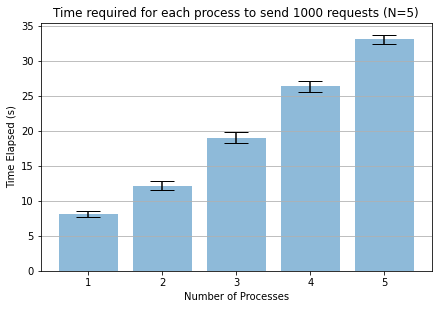

In [24]:
import matplotlib.pyplot as plt
import numpy as np
means = torch.mean(collections,axis=0)
error = torch.std(collections,axis=0)
plt.figure(1)
plt.bar(np.arange(5)+1,means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=12)
plt.tight_layout()
plt.grid(True, axis='y')
plt.xlabel('Number of Processes')
plt.ylabel('Time Elapsed (s)')
plt.title('Time required for each process to send 1000 requests (N=5)')

plt.show()

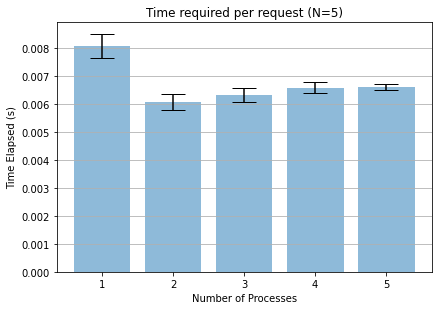

In [23]:
scaled_collections = torch.zeros((5,5))

for i in range(5):
    scaled_collections[:,i] = collections[:,i]/((i+1)*1000)

means_scaled = torch.mean(scaled_collections,axis=0)
error_scaled = torch.std(scaled_collections,axis=0)
plt.figure(1)
plt.bar(np.arange(5)+1,means_scaled, yerr=error_scaled, align='center', alpha=0.5, ecolor='black', capsize=12)
plt.tight_layout()
plt.grid(True, axis='y')
plt.xlabel('Number of Processes')
plt.ylabel('Time Elapsed (s)')
plt.title('Time required per request (N=5)')

plt.show()

In [10]:

"""
Time delay in sending messages (0.1 second)

"""

def f_sleep(i):
    dend = bittensor.dendrite(wallet=wallet)
    for idx in range(100):
        rep = dend.forward_text( endpoints=endpoints,inputs = inputs)
        time.sleep(0.1)
    return



In [ ]:
import time
N_processes = [1,2,3,5,10]
N = len(N_processes)

collections = torch.zeros((5,N))
logging =bittensor.logging(debug=False)
for j in range(5):
    print('experiment {}'.format(j))
    for i in range(N):
        start = time.time()
        process =  N_processes[i]
        with Pool(process) as p:
            reps = p.map(f_sleep, list(range(i+1)))

        end = time.time()
        print(end-start)
        collections[j,i] = end-start
    time.sleep(1)

experiment 0
11.207724332809448
11.165243148803711
11.453211545944214
11.484163045883179
11.641637802124023
experiment 1
11.164168357849121
11.390720129013062
11.411092758178711
11.508129596710205
11.554063558578491
experiment 2
11.200275182723999
11.483879804611206
11.41305422782898


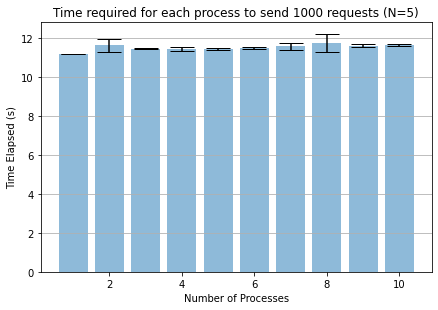

In [13]:
import matplotlib.pyplot as plt
import numpy as np
means = torch.mean(collections,axis=0)
error = torch.std(collections,axis=0)
plt.figure(1)
plt.bar(np.arange(N_processes)+1,means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=12)
plt.tight_layout()
plt.grid(True, axis='y')
plt.xlabel('Number of Processes')
plt.ylabel('Time Elapsed (s)')
plt.title('Time required for each process to send 1000 requests (N=5)')

plt.show()

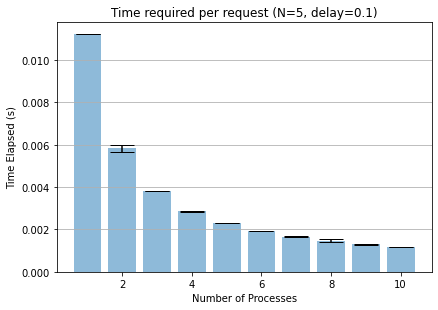

In [16]:
scaled_collections = torch.zeros((5,N_processes))

for i in range(N_processes):
    scaled_collections[:,i] = collections[:,i]/((i+1)*1000)

means_scaled = torch.mean(scaled_collections,axis=0)
error_scaled = torch.std(scaled_collections,axis=0)
plt.figure(1)
plt.bar(np.arange(N_processes)+1,means_scaled, yerr=error_scaled, align='center', alpha=0.5, ecolor='black', capsize=12)
plt.tight_layout()
plt.grid(True, axis='y')
plt.xlabel('Number of Processes')
plt.ylabel('Time Elapsed (s)')
plt.title('Time required per request (N=5, delay=0.1)')

plt.show()

In [6]:
tokenize =bittensor.tokenizer()

In [7]:
tokenize

PreTrainedTokenizerFast(name_or_path='EleutherAI/gpt-neo-1.3B', vocab_size=50257, model_max_len=2048, is_fast=True, padding_side='left', special_tokens={'bos_token': '[BOS]', 'eos_token': '[EOS]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]', 'additional_special_tokens': ['<s>NOTUSED', '</s>NOTUSED', '<eop>', '<eod>', '<formula>', '<mask_1><special0>', '<special1>', '<special2>', '<special3>', '<special4>', '<special5>', '<special6>', '<special7>', '<special8>', '<special9>']})

In [8]:
old_tokenize =bittensor.tokenizer(version='2.0.2')

In [9]:
old_tokenize

PreTrainedTokenizer(name_or_path='gpt2', vocab_size=50257, model_max_len=1024, is_fast=False, padding_side='left', special_tokens={'bos_token': '[BOS]', 'eos_token': '[EOS]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]', 'additional_special_tokens': ['<s>NOTUSED', '</s>NOTUSED', '<eop>', '<eod>', '<formula>', '<mask_1><special0>', '<special1>', '<special2>', '<special3>', '<special4>', '<special5>', '<special6>', '<special7>', '<special8>', '<special9>']})

In [18]:
decoded = tokenize.decode(inputs[0])

In [23]:
size = old_tokenize(decoded, padding=True)

In [24]:
len(size.input_ids)

2048